<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/02_neural_network_classification_with_tensorflow_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [1]:
import tensorflow as tf

In [21]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [8]:
# 3. Check the summary of the model
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_21 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
________________________________________________________

# 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [9]:
# Create date to view and fit
from sklearn.datasets import make_moons

# Make 1000 samples
n_samples = 1000

# Create moon
X, y = make_moons(n_samples,
                  noise=0.03,
                  random_state=42)

In [10]:
X[:10], y[:10]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908],
        [ 0.57954249, -0.35297867],
        [ 0.29488426, -0.20923768],
        [-0.01448804,  0.4358961 ],
        [ 1.62651037, -0.28120742],
        [ 0.67159767,  0.78642227]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [11]:
# Visualize our data
import pandas as pd
moon = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
moon

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


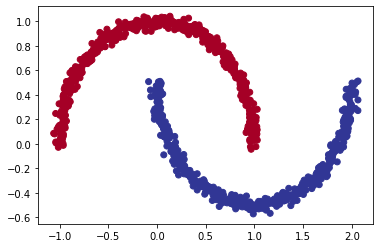

In [13]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [14]:
# Split into train data and test data
train_data, train_labels = X[:800], y[:800]
test_data, test_labels = X[800:], y[800:]

In [15]:
train_data.shape, train_labels.shape

((800, 2), (800,))

In [22]:
# Let try our data with model_1
history = model_1.fit(train_data, train_labels, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.5325
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.6850
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.7287
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6134 - accuracy: 0.7788
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.8175
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.8263
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8850
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8938
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.9087
Epoch 11/20
25/25 [

In [23]:
# Evaluate our model
model_1.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9100


[0.19419912993907928, 0.9100000262260437]

Wow, 91% at the first time, quite good

Text(0.5, 1.0, 'Model_1 loss curves')

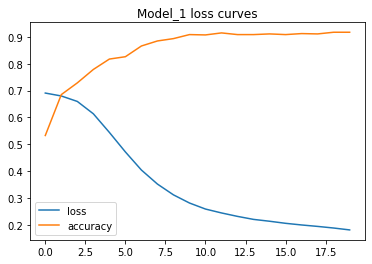

In [24]:
# Plot the training curves
pd.DataFrame(history.history).plot()
plt.title("Model_1 loss curves")